# Data Science em Python

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
path = 'C:\\Users\\Vinicius Bianchi\\Documents\\GitHub\\Python-datascience\\Datasets\\'
notas =pd.read_csv(path+'ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# Trocando o nome das colunas
notas.columns = ['usuarioId','filmeId','nota','momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
# Verificando valores distintos
notas['nota'].unique()


array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [8]:
# Contando valores numa coluna
notas.nota.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [9]:
print(notas.nota.mean())
print(notas.nota.median())

3.501556983616962
3.5


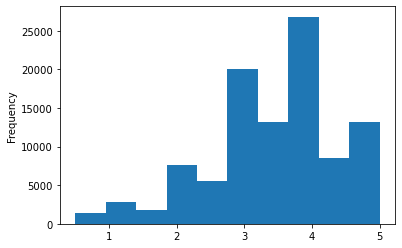

In [10]:
# Fazendo plots com pandas: histograma. podemos passar o par bins, para definir o numero de classes
notas.nota.plot(kind='hist')


In [11]:
# Resumo Estatísitico
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [12]:
# Aplicando querys aos Dataframes. (perguntas/testeslogicos no DF)
notas.query('filmeId == 1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [13]:
# Tirando a média de uma coluna
notas.query("filmeId==1").nota.mean()



3.9209302325581397

In [14]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

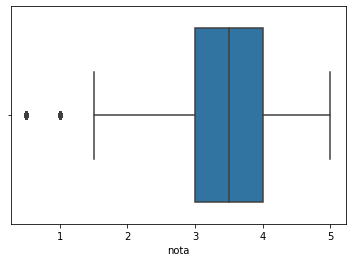

In [15]:
# Utilizando seaborn boxplot


import seaborn as sns

sns.boxplot(notas.nota)

In [16]:
# Groupby: calculando média por filme
medias_por_filme = notas.groupby(['filmeId']).nota.mean()
medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

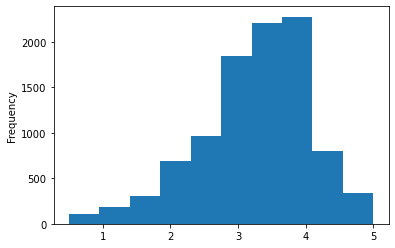

In [17]:
#Plot Histograma pandas
medias_por_filme.plot(kind='hist')

Text(0.5, 1.0, 'Histograma das médias dos filmes')

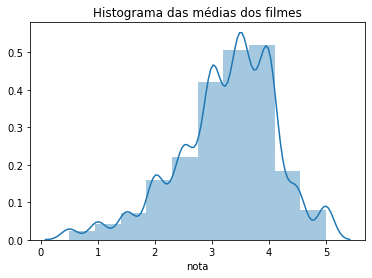

In [18]:
# Plot com seaborn Histograma
sns.distplot(medias_por_filme, bins=10)
plt.title("Histograma das médias dos filmes") #add título

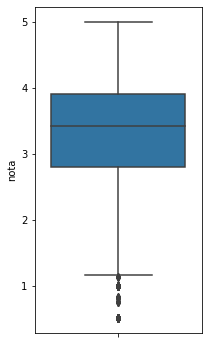

In [19]:
# Boxplot seaborn
# Mexendo no tamanho
plt.figure(figsize=(3,6))
sns.boxplot(y=medias_por_filme)

#### Arquivo Movies

In [20]:
filmes = pd.read_csv(path+'movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Análise do arquvio tmdb_5000_movies.csv

In [21]:
tmdb = pd.read_csv(path+'tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [22]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [23]:
# Contando e agrupango var categóricas
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
cs       2
id       2
ta       2
ar       2
ro       2
sl       1
vi       1
hu       1
pl       1
no       1
el       1
te       1
is       1
af       1
xx       1
ky       1
ps       1
nb       1
tr       1
Name: original_language, dtype: int64

## Tranformando série em DF e Plotando resultados

In [24]:
qnt_tmdb = tmdb.original_language.value_counts().to_frame().reset_index()
qnt_tmdb.columns = ['original_language', 'Qnt']
qnt_tmdb.head(3)
# to_frame() converte a série em DF de uma coluna + index
# reset_index() o index vira coluna e reinicia o indice.

,original_language,Qnt
0,en,4505
1,fr,70
2,es,32


In [25]:
qnt_tmdb.columns

Index(['original_language', 'Qnt'], dtype='object')

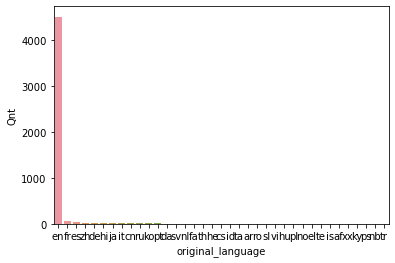

In [26]:
# Plot grafico de barras com seaborn
sns.barplot(data=qnt_tmdb,x='original_language',y='Qnt')

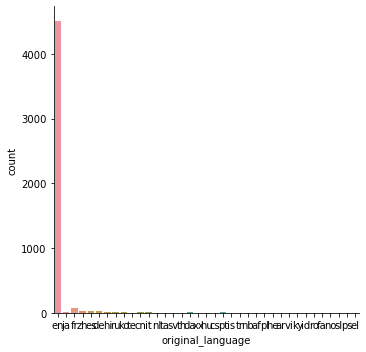

In [27]:
# Platando direto por grafico categórico
sns.catplot(data=tmdb,x='original_language', kind='count')
# Aqui não há necessidade de fazer as transforamçoes e agrupamentos, o seaborn abstrai

([<matplotlib.patches.Wedge at 0x272f3ba46a0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

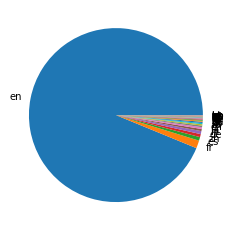

In [28]:
# Gráfico de pizza matplotlib: plt.pie()
plt.pie(qnt_tmdb['Qnt'],labels=qnt_tmdb['original_language'])

#Claramente uma porcaria, mas fica aí por desencargo


In [29]:
qnt_tmdb.head()

,original_language,Qnt
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


In [30]:
#
qnt_tot = qnt_tmdb.Qnt.sum()
qnt_en = tmdb.original_language.value_counts().loc['en']
qnt_outros = qnt_tot - qnt_en

In [31]:
dados = {'Idioma':['Ingles','Outros'],
        'Total':[qnt_en,qnt_outros]}
dados = pd.DataFrame(dados)
dados.head()

,Idioma,Total
0,Ingles,4505
1,Outros,298


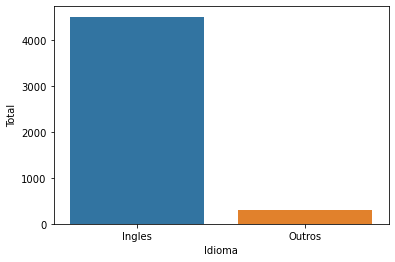

In [32]:
sns.barplot(data=dados, x = 'Idioma', y='Total')

([<matplotlib.patches.Wedge at 0x272f34b74f0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'Ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'Outros')])

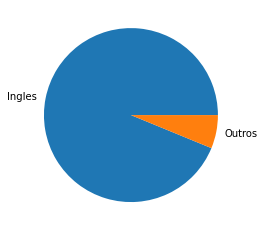

In [33]:
plt.pie(dados.Total, labels=dados.Idioma)

In [34]:
total_idioma_outros = tmdb.query('original_language != "en"').original_language.value_counts().to_frame()
total_idioma_outros.head()

,original_language
fr,70
es,32
zh,27
de,27
hi,19


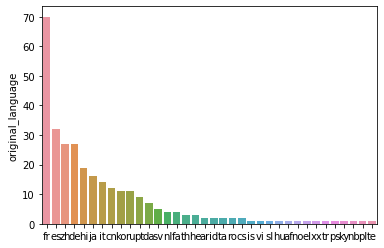

In [35]:
sns.barplot(data=total_idioma_outros,
            x= total_idioma_outros.index,
            y='original_language')

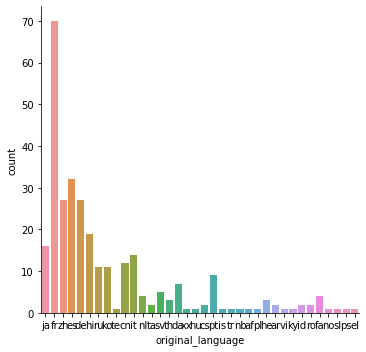

In [36]:
total_idioma_outros = tmdb.query('original_language != "en"')




sns.catplot(x = "original_language", kind="count",
              data = total_idioma_outros)

In [37]:
ordem = total_idioma_outros.original_language.value_counts()

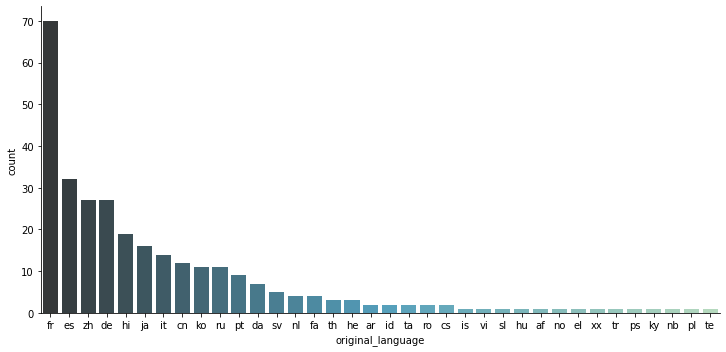

In [38]:
sns.catplot(x = "original_language", kind="count",
              data = total_idioma_outros,
           aspect=2,
           palette="GnBu_d",
           order=ordem.index)

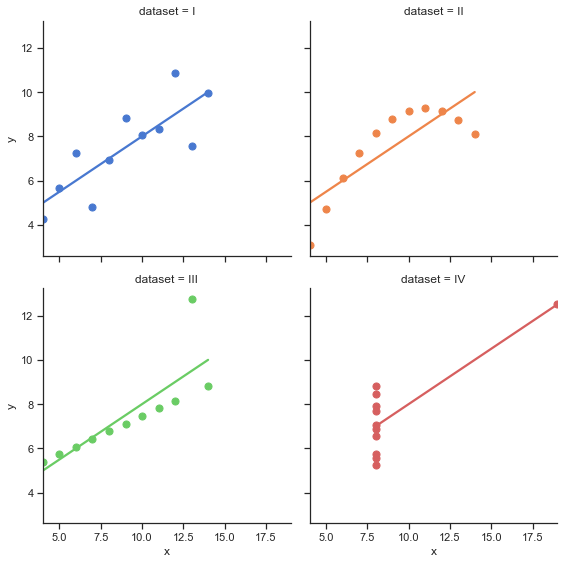

In [39]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# Analisando o Jumanji e Toy Story

In [43]:
import matplotlib.pyplot as plt 
import numpy as np 

In [42]:
notas.head(2)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [46]:
# Quantidade de notas (linhas)
notas_toy_story = notas.query('filmeId == 1')
notas_jumanji = notas.query('filmeId == 2')
print(len(notas_toy_story), len(notas_jumanji))

215 110


In [55]:
# Media das notas
print('Nota Média do Toy Story é %2.f' % notas_toy_story.nota.mean())
print('Nota Média do Jumanji é %2.f' % notas_jumanji.nota.mean())


Nota Média do Toy Story é  4
Nota Média do Jumanji é  3


In [56]:
# Desvio Padrão
print(notas_toy_story.nota.std(),notas_jumanji.nota.std())

0.8348591407114045 0.8817134921476455


In [58]:
# Medianas
print('Nota Mediana do Toy Story é %2.f' % notas_toy_story.nota.median())
print('Nota Mediana do Jumanji é %2.f' % notas_jumanji.nota.median())

Nota Mediana do Toy Story é  4
Nota Mediana do Jumanji é  4


# Exemplo Hipotético

In [59]:
# Notas de filme
## A função np.append() junta arrays numpy
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [61]:
# Para aplicar métodos em arrays numpy, usamos métodos numpy
## np.std() desvio padrão e np.median() mediana
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

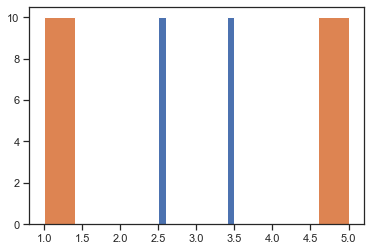

In [63]:
plt.hist(filme1)
plt.hist(filme2)



{'whiskers': [<matplotlib.lines.Line2D at 0x272f847f1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x272f847fbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x272f8447220>,
 'medians': [<matplotlib.lines.Line2D at 0x272f862c2b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x272f862c5b0>,
 'means': []}

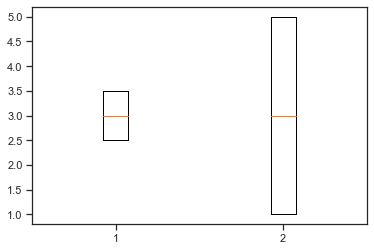

In [67]:
# Box plot duplo com matplotlib
plt.boxplot([filme1, filme2])

In [66]:
notas_toy_story.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


{'whiskers': [<matplotlib.lines.Line2D at 0x272f865f430>,
 'caps': [<matplotlib.lines.Line2D at 0x272f865ff70>,
 'boxes': [<matplotlib.lines.Line2D at 0x272f865bb80>,
 'medians': [<matplotlib.lines.Line2D at 0x272f86637c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x272f8663f10>,
 'means': []}

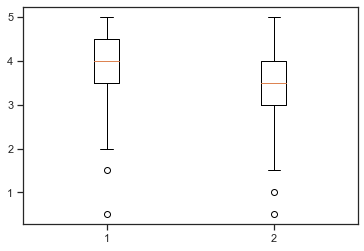

In [70]:
# Box plot jumanji e toy story com matplotlib

plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])



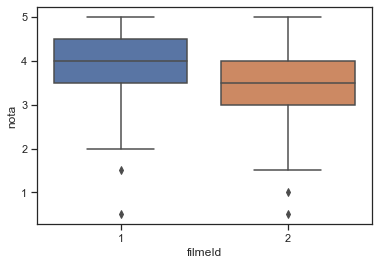

In [78]:
# Box plot jumanji e toy story com matplotlib

sns.boxplot(y=notas.query('filmeId == 1 or filmeId == 2').nota, x = notas.query('filmeId == 1 or filmeId == 2').filmeId)

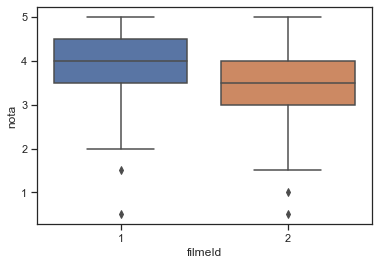

In [81]:
# ou 
sns.boxplot(x='filmeId', y = 'nota', data = notas.query('filmeId in [1,2]'))